<a href="https://colab.research.google.com/github/Eyu-148/CS254ML-HW/blob/main/Eyu_Chen_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4


In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# sklearn models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

## Part 0: Prepare the data

#### Q1) (10 points) Load Data
- Use the sklearn load_digits() function to collect your data. 
- You will be using this data for the entire assignment. 
- Using the .data and .features attributes of this dataset and create a pandas dataframe.<br><br>Note: You will not need this dataframe for any of the preceding questions. The purpose of making this dataframe is to practice this paradigm.

In [2]:
digits = datasets.load_digits()
df = pd.DataFrame(digits.data)

#### Q2) (10 points) Visualize data-points
- Use matplotlib.pyplot's imshow function to display the first five items in our dataset. 
- Be sure to include the target value with these five images.

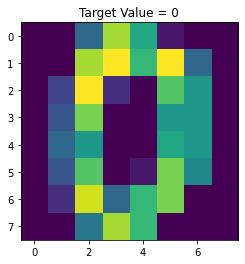

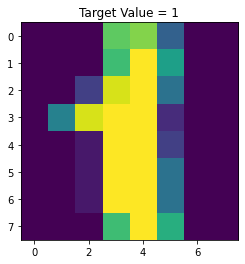

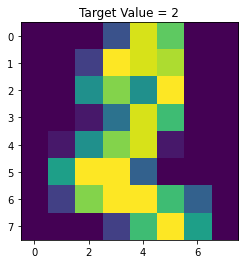

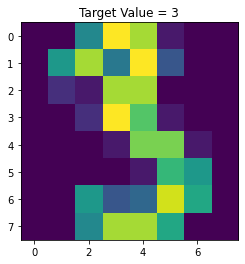

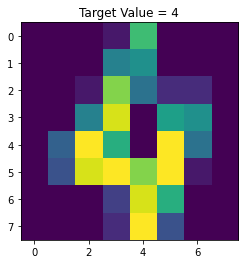

In [3]:
for i in range(0,5):
  plt.title("Target Value = " + str(digits.target[i]))
  plt.imshow(digits.images[i])
  plt.show()

#### Grad Students Question (Extra credit for Undergraduates) ) (20 points) Dimensionality Reduction
- Reduce the data into a two dimensional space using principle component analysis.
- Once this data is transformed, create a scatter plot with different colors for different classes of data-points.<br><br>Hint: The PCA object in SKlearn operates the same way as the PolynomialFeatures object. That is, once you create a PCA object with some parameters, you can use it to "fit_transform" your data.<br> https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

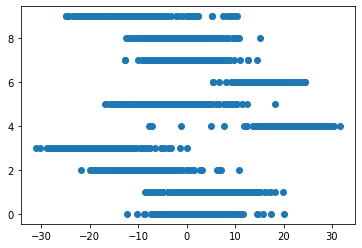

In [44]:
pca = PCA(n_components=1)
x_pca = digits.data
x_pca = pca.fit_transform(digits.data)
plt.scatter(x_pca, digits.target)

#### Q3) (10 points) Train Test Split
- We need to split our data into two groups in order to validate model performance and generalization ability
- Use the sklearn train_test_split function to obtain training data and testing data. 
- Important: you must use a test size of 0.25 and a random_state of 0.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

## Part 1: Regression

#### Q4)  (10 points) Logistic Regression model
- Create a LogisticRegression object which can be imported from sklearn's linear_model module.
- Call the .fit() function on your model with x_train and y_train as parameters.
- Call the .predict() function on your model with x_test as a parameter

In [26]:
# training data and test with predict function, obtain the predicted values
model = LogisticRegression(random_state=0, solver='liblinear')
clf = model.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

#### Q5) (10 points) Visualization
- Use sklearn's confusion matrix function to obtain a confusion matrix in np.array format
- Display this confusion matrix as a pandas DataFrame (with target class names in the columns and index fields).
- Display this confusion matrix as a heatmap using matplotlib.pyplot's .imshow() function.

,0,1,2,3,4,5,6,7,8,9
0,37,0,0,0,0,0,0,0,0,0
1,0,39,0,0,0,0,2,0,2,0
2,0,0,41,3,0,0,0,0,0,0
3,0,0,1,43,0,0,0,0,0,1
4,0,0,0,0,38,0,0,0,0,0
5,0,1,0,0,0,47,0,0,0,0
6,0,0,0,0,0,0,52,0,0,0
7,0,1,0,1,1,0,0,45,0,0
8,0,3,1,0,0,0,0,0,43,1
9,0,0,0,1,0,1,0,0,1,44


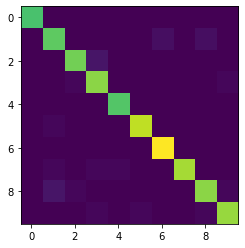

In [27]:
# make confusion matrix with actual value and predicted value
# actual target value = y_test
# i-th class(row) is for actual label
# j-th class(column) is for predicted label
cm = confusion_matrix(y_test, y_predicted)
plt.imshow(cm)
pd.DataFrame(data=cm, index=digits.target_names, columns=digits.target_names)

#### Q6) (15 points) Performance Metrics
- Create a function to calculate the precision values for all classes.
- Create a function to calculate the recall values for all classes.
- Use sklearn's classification_report as a reference for "correct" precision and recall values.

In [28]:
def custom_precision_recall(conf_matrix):
  # precision = true positive / total of predicted positive
  # recall = true positive / total of actual positive
  # true positive are on the diagonal
  # false positive are column-wise sums without diagonal
  # false negative are row-wise sums without diagonal
  true_pos = np.diag(conf_matrix)
  false_pos = np.sum(conf_matrix, axis=0) - true_pos
  false_neg = np.sum(conf_matrix, axis=1) - true_pos

  precision = true_pos / (true_pos + false_pos)
  recall = true_pos / (true_pos + false_neg)

  return precision, recall

In [29]:
print("*** By Built-in method ***")
print(classification_report(y_test, y_predicted))

print("*** By Formula(precision + recall) ***")
custom_precision_recall(cm)

*** By Built-in method ***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450

*** By Formula(precision + recall) ***


(array([1.        , 0.88636364, 0.95348837, 0.89583333, 0.97435897,
        0.97916667, 0.96296296, 1.        , 0.93478261, 0.95652174]),
 array([1.        , 0.90697674, 0.93181818, 0.95555556, 1.        ,
        0.97916667, 1.        , 0.9375    , 0.89583333, 0.93617021]))

## Part 2: Support Vector Machine

#### Q7) (10 points) SVM model
- Create an SVC object which can be imported from sklearn's svm module.
- Call the .fit() function on your model with x_train and y_train as parameters.
- Call the .predict() function on your model with x_test as a parameter

In [32]:
model_svc = SVC(kernel="linear")
clf_svc = model_svc.fit(X_train, y_train)
y_predictedsvc = clf_svc.predict(X_test)

#### Q8) (10 points) Visualization
- Use sklearn's confusion matrix function to obtain a confusion matrix in np.array format
- Display this confusion matrix as a pandas DataFrame (with target class names in the columns and index fields).
- Display this confusion matrix as a heatmap using matplotlib.pyplot's .imshow() function.

,0,1,2,3,4,5,6,7,8,9
0,37,0,0,0,0,0,0,0,0,0
1,0,42,0,0,0,0,0,0,1,0
2,0,0,44,0,0,0,0,0,0,0
3,0,0,0,43,0,0,0,0,1,1
4,0,0,0,0,38,0,0,0,0,0
5,0,0,0,0,0,47,0,0,0,1
6,0,1,0,0,0,0,51,0,0,0
7,0,0,0,0,1,0,0,47,0,0
8,0,3,1,0,0,0,0,0,44,0
9,0,0,0,1,0,1,0,0,1,44


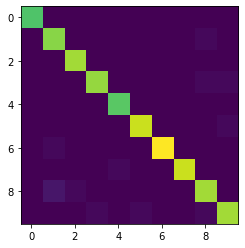

In [33]:
cm_svc = confusion_matrix(y_test, y_predictedsvc)
plt.imshow(cm_svc)
pd.DataFrame(cm_svc, columns=digits.target_names, index=digits.target_names)

#### Q9) (15 points) Performance Metrics and Comparison
- Create a function to obtain useful metrics for your SVM's performance
- There is no specific correct answer for a "useful metric", just make sure you can justify your metrics/process
- How does this performance compare to that of the regression model? (and explain why this might be)

In [34]:
print(classification_report(y_test, y_predictedsvc))
print("Cmpared with regression")
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

Cmpared with regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44


It is clear that SVC makes a similar perfomance with some higher report data than logisitic regression, which implies that SVC might do better in this case. Sometimes these 2 classifiers are the same in some cases. Both of them divide the feature space and come out with a decision boundary. Logisitic regression uses sigmoid function to predict the probability, while SVC decides the boundary in a geometric way and maximize the margin.